## Multi‑Layer Perceptron (MLP)

The perceptron is only good for separating things with a straight line. But what if the data can't be split that easily? That’s where the MLP comes in.

By adding one or more hidden layers and using non‑linear activation functions, the MLP becomes powerful enough to model complex decision boundaries.

In [1]:
import random
import math
import matplotlib.pyplot as plt

random.seed(1)
# now seeing 1 after 42s and a 0 :D

#### Let’s try $XOR$

This classic dataset can't be separated with a straight line:
- $(0,0) → 0$
- $(0,1), (1,0) → 1$
- $(1,1) → 0$

It's the perfect case to show why we need hidden layers.

Now we are going to assign XOR dataset and visualise XOR data.


In [3]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
y = [0, 1, 1, 0]

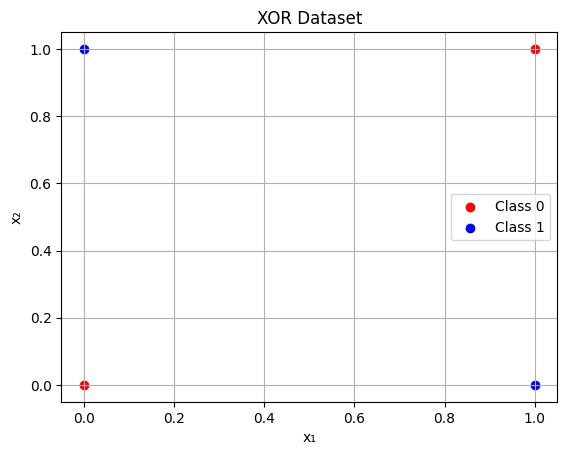

In [4]:
for i, point in enumerate(X):
    colour = 'blue' if y[i] == 1 else 'red'
    label = f'Class {y[i]}' if i in [0,1] else ""
    plt.scatter(point[0], point[1], color=colour, label=label)

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('XOR Dataset')
plt.legend()
plt.grid(True)
plt.show()

We will use the sigmoid function for both hidden and output layers. It squashes numbers into the $[0, 1]$ range.

In [5]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

### Building the MLP Class

We’ll use:
- 2 input neurons (x₁ and x₂)
- 2 hidden neurons
- 1 output neuron

All weights, biases, activations, and updates will be handled manually.

In [6]:
class MLP:
    def __init__(self, input_size=2, hidden_size=2, lr=0.1, epochs=10000):
        self.lr = lr
        self.epochs = epochs

        self.w1 = [[random.uniform(-1, 1) for _ in range(input_size)] for _ in range(hidden_size)]
        self.b1 = [random.uniform(-1, 1) for _ in range(hidden_size)]
        self.w2 = [random.uniform(-1, 1) for _ in range(hidden_size)]
        self.b2 = random.uniform(-1, 1)

    def forward(self, x):
        self.z1 = [sum(w*x_i for w, x_i in zip(self.w1[i], x)) + self.b1[i] for i in range(2)]
        self.a1 = [sigmoid(z) for z in self.z1]
        self.z2 = sum(w*a for w, a in zip(self.w2, self.a1)) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, x, y_true):
        error = self.a2 - y_true
        d_out = error * sigmoid_derivative(self.a2)

        for i in range(2):
            self.w2[i] -= self.lr * d_out * self.a1[i]
        self.b2 -= self.lr * d_out

        for i in range(2):
            d_hidden = d_out * self.w2[i] * sigmoid_derivative(self.a1[i])
            for j in range(2):
                self.w1[i][j] -= self.lr * d_hidden * x[j]
            self.b1[i] -= self.lr * d_hidden

    def fit(self, X, y):
        self.losses = []
        for _ in range(self.epochs):
            total_loss = 0
            for xi, yi in zip(X, y):
                out = self.forward(xi)
                self.backward(xi, yi)
                total_loss += (out - yi) ** 2
            self.losses.append(total_loss / len(X))

    def predict(self, x):
        return 1 if self.forward(x) >= 0.5 else 0

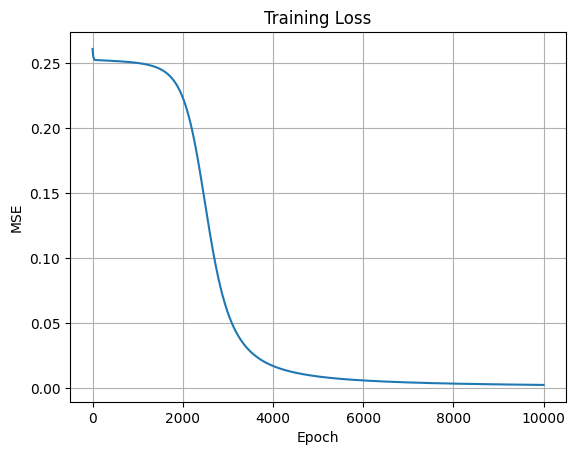

In [7]:
model = MLP()
model.fit(X, y)

plt.plot(model.losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

In [9]:
# we'd rather check if the model correctly predicts XOR outputs after training
for xi, yi in zip(X, y):
    pred = model.predict(xi)
    print(f"Input: {xi}, Prediction: {pred}, Actual: {yi}")

Input: [0, 0], Prediction: 0, Actual: 0
Input: [0, 1], Prediction: 1, Actual: 1
Input: [1, 0], Prediction: 1, Actual: 1
Input: [1, 1], Prediction: 0, Actual: 0


## What We’ve Understood from MLP

This was our first step into real neural networks — ones with layers, activations, and learning through backpropagation.

Here's what we learned:

- A single perceptron can’t solve problems like XOR — the data just isn’t linearly separable.
- By adding a hidden layer and using non-linear activations, the MLP can create more flexible decision boundaries.
- The network learned by using **forward propagation** to make predictions, and **backpropagation** to adjust weights based on the error.
- Every training step tweaked the weights just a little to reduce the overall loss, which we tracked with a line plot.
- At the end, the model was able to correctly classify all four $XOR$ points — something a plain perceptron just can’t do.

You now understand the core mechanism behind deep learning. Everything from large language models to image recognition builds on this basic idea: layers of neurons learning from data by adjusting weights to minimise error.